In [1]:

from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')
X, y = mnist["data"], mnist["target"]
type(mnist)



C:\Users\HAVVANUR\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\HAVVANUR\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


sklearn.utils.Bunch

In [2]:
import numpy as np
y_new = np.zeros(y.shape)
y_new[np.where(y == 0.0)[0]] = 1
y = y_new



In [3]:
m = 60000
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
y_train, y_test = y[:m].reshape(1,m), y[m:].reshape(1,m_test)



In [4]:
np.random.seed(138)
shuffle_index = np.random.permutation(m)
X_train, y_train = X_train[:,shuffle_index], y_train[:,shuffle_index] #veriyi karıştırıyor

get_ipython().magic('matplotlib inline')
import matplotlib
import matplotlib.pyplot as plt



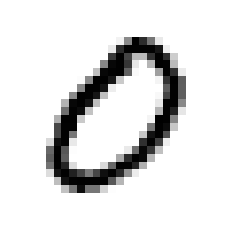

[1.]


In [5]:
i = 3
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
print(y_train[:,i])




In [6]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s


def compute_loss(Y, Y_hat): #gerçek çıktı, benim ürettiğim çıktı iki veri alıyor

    m = Y.shape[1]
    L = -(1./m) * ( np.sum( np.multiply(np.log(Y_hat),Y) ) + np.sum( np.multiply(np.log(1-Y_hat),(1-Y)) ) )

    return L




In [7]:
learning_rate = 1

X = X_train
Y = y_train

n_x = X.shape[0]
m = X.shape[1]

W = np.random.randn(n_x, 1) * 0.01
b = np.zeros((1, 1))

for i in range(100): #daha hızlı çalışması için range 2000 den 100 düşürdük
    Z = np.matmul(W.T, X) + b
    A = sigmoid(Z)

    cost = compute_loss(Y, A)

    dW = (1/m) * np.matmul(X, (A-Y).T)
    db = (1/m) * np.sum(A-Y, axis=1, keepdims=True)

    W = W - learning_rate * dW #eski degerleri yeni degerlere atadı
    b = b - learning_rate * db

    if (i % 5 == 0): #her 5 adımda bir rapor sun. her bir adımda hata azalmalıdır
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)



C:\Users\HAVVANUR\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
C:\Users\HAVVANUR\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


Epoch 0 cost:  nan
Epoch 5 cost:  nan
Epoch 10 cost:  nan
Epoch 15 cost:  nan
Epoch 20 cost:  nan
Epoch 25 cost:  nan
Epoch 30 cost:  nan
Epoch 35 cost:  nan
Epoch 40 cost:  nan
Epoch 45 cost:  nan
Epoch 50 cost:  nan
Epoch 55 cost:  nan
Epoch 60 cost:  nan
Epoch 65 cost:  nan
Epoch 70 cost:  nan
Epoch 75 cost:  nan
Epoch 80 cost:  nan
Epoch 85 cost:  nan
Epoch 90 cost:  nan
Epoch 95 cost:  nan
Final cost: nan


In [11]:
from sklearn.metrics import classification_report, confusion_matrix

Z = np.matmul(W.T, X_test) + b
A = sigmoid(Z)

predictions = (A>.5)[0,:]
labels = (y_test == 1)[0,:]

print(confusion_matrix(predictions, labels)) #dogru ve yanlış class bilgisini sunuyor 

#burda bir matris olustu ve doğru class ve yanlıs class bilgisini verdi, ikisinin toplamı dogru sonucu vermesi gerekiyor
#confision matris olarak geçiyor.
  # A     B
# A 9000  70
# B 40    800 BURDA 9000 ve 800 doğru degerler oldu. Bir şekilde performans ölçüldü.


print(classification_report(predictions, labels))
# yine hata ölçüm yöntemleri



[[8916   45]
 [ 104  935]]
              precision    recall  f1-score   support

       False       0.99      0.99      0.99      8961
        True       0.95      0.90      0.93      1039

    accuracy                           0.99     10000
   macro avg       0.97      0.95      0.96     10000
weighted avg       0.98      0.99      0.98     10000



In [12]:
#Bir One Hidden Layer Ekledik

X = X_train
Y = y_train

n_x = X.shape[0]
n_h = 64
learning_rate = 1

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(1, n_h)
b2 = np.zeros((1, 1))

for i in range(50):

    Z1 = np.matmul(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2, A1) + b2
    A2 = sigmoid(Z2)

    cost = compute_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if i % 10 == 0:
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)


Epoch 0 cost:  1.0370692800139762
Epoch 10 cost:  0.31780578921129554
Epoch 20 cost:  0.2207180936697868
Epoch 30 cost:  0.18060323497652966
Epoch 40 cost:  0.15851330145134468
Final cost: 0.1445138417886336
